# Project 02 - Image Processing

## Student Information

- Full name: Đinh Vũ Gia Hân
- Student ID: 22127098
- Class: 22CLC08

## Required Libraries

In [1]:
# IMPORT YOUR LIBS HERE
import numpy as np                  # array, vector, matrix calculations
from PIL import Image               # read and write image files
import matplotlib.pyplot as plt     # show image

## Function Definitions

In [15]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    try:
        img = Image.open(img_path)
    except FileNotFoundError:
        print("ERROR: File not found")
        return None
    except:
        print("ERROR: Unknown Error")
        return None

    return img

def show_img(img, func):
    ''' 
    Show image after processing

    Parametersq
    ----------
    img : <your type>
        Result image
    func : str
        Function name
    '''
    # YOUR CODE HERE
    # Show image
    if func != "gray":
        plt.imshow(img)
        plt.imshow(img)
    else: 
        plt.imshow(img, cmap = 'gray') # If function is RGB_to_gray, show image with gray cmap
        plt.imshow(img, cmap = 'gray')
    plt.show()

def save_img(input_file, result_img, func):  
    '''
    Save image after processing

    Parameters
    ----------
    input_file : str
        Input file name
    result_img : <your type>
        Result image
    func : str
        Function name
    ''' 
    # Save image
    output_file = input_file.split('.')[0] + '_' + func + '.' + input_file.split('.')[1]
    result_img.save(output_file)
    
#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE
def adjust_brightness(img, brightness):
    '''
    Adjust brightness of image

    Parameters
    ----------
    img : <your type>
        Image
    brightness : int
        Brightness value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Clip brightness value to [-255, 255]
    brightness = np.clip(float(brightness), -255, 255)

    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Adjust brightness
    bright_img_arr = np.clip(img_arr + brightness, a_min = 0, a_max = 255)

    # Convert matrix to image
    bright_img = Image.fromarray(np.uint8(bright_img_arr))

    return bright_img

def adjust_contrast(img, contrast):
    '''
    Adjust contrast of image

    Parameters
    ----------
    img : <your type>
        Image
    contrast : int
        Contrast value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Clip contrast value to [-255, 255]
    contrast = np.clip(float(contrast), -255, 255)

    # Calculate factor
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Adjust brightness
    contrast_img_arr = np.clip(factor * (img_arr - 128) + 128, a_min = 0, a_max = 255)

    # Convert matrix to image
    contrast_img = Image.fromarray(np.uint8(contrast_img_arr))

    return contrast_img

def flip_horizontal(img):
    '''
    Flip image horizontally

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE 
    # Convert image to matrix
    img_arr = np.array(img)
        
    # Reverse columns
    flipped_img_arr = img_arr[:, ::-1]

    # Convert matrix to image
    flipped_img = Image.fromarray(flipped_img_arr)
    
    return flipped_img

def flip_vertical(img):
    '''
    Flip image vertically

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)
        
    # Reverse row
    flipped_img_arr = img_arr[::-1, :]

    # Convert matrix to image
    flipped_img = Image.fromarray(flipped_img_arr)
    
    return flipped_img
    
def RGB_to_gray(img):
    '''
    Convert image to gray

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Create color weight
    color_weight = np.array([0.3, 0.59, 0.11])

    # Multiply matrix with color weight to get gray image
    gray_img_arr = np.clip(np.matmul(img_arr, color_weight), a_min = 0, a_max = 255)

    # Convert matrix to image
    gray_img = Image.fromarray(np.uint8(gray_img_arr))

    return gray_img
    

def RGB_to_sepia(img):
    '''
    Convert image to sepia

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Create color weight
    color_weight = np.array([[0.393, 0.769, 0.189], [0.349, 0.686, 0.168], [0.272, 0.534, 0.131]])

    # Multiply matrix with color weight to get sepia image
    sepia_img_arr = np.clip(np.matmul(img_arr, color_weight.T), a_min = 0, a_max = 255)

    # Convert matrix to image
    sepia_img = Image.fromarray(np.uint8(sepia_img_arr))

    return sepia_img

def blur_image(img):
    '''
    Blur image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Get Gaussian blur 5x5 kernel
    kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]]).astype(np.float32) / 256
    
    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Get width and height of image and kernel
    image_height, image_width = img_arr.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # Calculate padding
    padding = kernel_height // 2

    # Create result matrix with the same size as image
    blurred_img_arr = np.zeros((image_height, image_width, 3))

    # Create zero matrix to store image with padding
    tmp = np.zeros((image_height + 2 * padding, image_width + 2 * padding, 3))

    # Copy image to center of zero matrix
    tmp[padding:padding + image_height, padding:padding + image_width, :] = img_arr

    # Convolution
    for i in range(image_height) :
        for j in range(image_width):
            blurred_img_arr[i, j, :] = np.clip(np.sum(tmp[i:i + kernel_height, j:j + kernel_width, :] * kernel[:, :, np.newaxis], axis=(0, 1)), a_min = 0, a_max = 255)

    # Convert matrix to image
    blurred_img = Image.fromarray(np.uint8(blurred_img_arr))        

    return blurred_img

def sharpen_image(img):
    '''
    Blur image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Get Sharpen kernel
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    
    # Convert image to matrix
    img_arr = np.array(img).astype(np.float32)

    # Get width and height of image and kernel
    image_height, image_width = img_arr.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # Calculate padding
    padding = kernel_height // 2

    # Create result matrix with the same size as image
    sharpen_img_arr = np.zeros((image_height, image_width, 3))

    # Create zero matrix to store image with padding
    tmp = np.zeros((image_height + 2 * padding, image_width + 2 * padding, 3))

    # Copy image to center of zero matrix
    tmp[padding:padding + image_height, padding:padding + image_width, :] = img_arr

    # Convolution
    for i in range(image_height) :
        for j in range(image_width):
            sharpen_img_arr[i, j, :] = np.clip(np.sum(tmp[i:i + kernel_height, j:j + kernel_width, :] * kernel[:, :, np.newaxis], axis=(0, 1)), a_min = 0, a_max = 255)

    # Convert matrix to image
    sharpen_img = Image.fromarray(np.uint8(sharpen_img_arr))        

    return sharpen_img

def crop_image(img, crop_height, crop_width):
    '''
    Crop image from center

    Parameters
    ----------
    img : <your type>
        Image
    crop_height : int
        Height of cropped image
    crop_width : int
        Width of cropped image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)

    # Get height, width of image
    img_height, img_width = img_arr.shape[:2]

    # Calculate the start point to crop
    start_x = np.clip((img_width - crop_width) // 2, a_min = 0, a_max = img_width)
    start_y = np.clip((img_height - crop_height) // 2, a_min = 0, a_max = img_height)
    
    # Crop array
    cropped_img_arr = img_arr[start_y:start_y + crop_height, start_x:start_x + crop_width]

    # Convert matrix to image
    cropped_image = Image.fromarray(np.uint8(cropped_img_arr))

    return cropped_image

def circle_frame(img):
    ''' 
    Crop image to circle frame

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)

    # Get size of image (square image)
    size = img_arr.shape[0]

    # Define center and radius of circle
    center = (size // 2, size // 2)
    radius = size // 2

    # Create matrix to store index i and j
    matrix_idx_j = np.tile(np.arange(size), reps = (size, 1))
    matrix_idx_i = np.transpose(matrix_idx_j)

    # Create mask to mask out pixels outside the circle
    mask = (matrix_idx_i - center[0])**2 + (matrix_idx_j - center[1])**2 > radius**2 

    # Apply mask to image
    img_arr[mask] = [0, 0, 0]

    # Convert matrix to image
    circle_frame_img = Image.fromarray(np.uint8(img_arr))

    return circle_frame_img

def mask_degree(a_pow_2, b_pow_2, center, alpha, matrix_i, matrix_j):
    '''
    Define the mask of the points outside the rotated ellipse with angle alpha clockwise around the coordinate axis

    Parameters
    ----------
    a_pow_2 : int
        Semi-major axis squared
    b_pow_2 : int
        Semi-minor axis squared
    center : int
        Center of the ellipse
    alpha : float
        Angle of rotation in degrees
    matrix_i : np.ndarray
        Matrix storing the row coordinates of all pixels
    matrix_j : np.ndarray
        Matrix storing the column coordinates of all pixels

    Returns
    -------
        np.ndarray 
    '''
    # Formula of the ellipse rotated by alpha degrees clockwise around the coordinate axis
    ellipse = (((matrix_i - center) * np.cos(alpha) - (matrix_j - center) * np.sin(alpha)) ** 2) / a_pow_2 + (((matrix_i - center) * np.sin(alpha) + (matrix_j - center) * np.cos(alpha)) ** 2) / b_pow_2
    
    # Create mask to mask out pixels outside the ellipse
    masks = ellipse > 1

    return masks

def ellipse_frame(img):
    ''' 
    Crop image to 2 diagoanl ellipses frame

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)

    # Get size of image (square image)
    size = img_arr.shape[0]

    # Define center of ellipse
    center = (size // 2, size // 2)

    # Define semi-major and semi-minor axis of ellipse
    a_pow_2 = 0.375 * (size ** 2) 
    b_pow_2 = 0.125 * (size ** 2) 

    # Create matrix to store index i and j
    matrix_idx_j = np.tile(np.arange(size), reps = (size, 1))
    matrix_idx_i = np.transpose(matrix_idx_j)

    # Create mask to mask out pixels outside the circle
    masks1 = mask_degree(a_pow_2, b_pow_2, center[0], 3 * np.pi / 4, matrix_idx_i, matrix_idx_j) | mask_degree(a_pow_2, b_pow_2, center[0], 3 * np.pi / 4, matrix_idx_i, matrix_idx_j)
    masks2 = mask_degree(a_pow_2, b_pow_2, center[0], np.pi / 4, matrix_idx_i, matrix_idx_j) | mask_degree(a_pow_2, b_pow_2, center[0], np.pi / 4, matrix_idx_i, matrix_idx_j)

    # Kết hợp lại, các điểm ảnh nằm ngoài cả 2 ellipse sẽ 
    # Combine masks
    masks = np.logical_and(masks1, masks2)  

    # Apply mask to image
    img_arr[masks] = [0, 0, 0]

    # Convert matrix to image
    ellipse_frame_img = Image.fromarray(np.uint8(img_arr))

    return ellipse_frame_img

def zoom_in(img, factor):
    '''
    Zoom in the image by a specified factor

    Parameters
    ----------
    img : <your type>
        Image to be zoomed in
    factor : float
        Zoom in factor

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)

    # Repeat rows and columns
    zoomed_in_img_arr = np.repeat(np.repeat(img_arr, factor, axis = 0), factor, axis = 1)

    # Convert matrix to image
    zoomed_in_img = Image.fromarray(zoomed_in_img_arr)

    return zoomed_in_img

def zoom_out(img, factor):
    '''
    Zoom out the image by a specified factor

    Parameters
    ----------
    img : <your type>
        Image to be zoomed out
    factor : float
        Zoom out factor

    Returns
    -------
        Image
    '''
    # YOUR CODE HERE
    # Convert image to matrix
    img_arr = np.array(img)

    # Zoom out
    zoomed_out_img_arr = img_arr[::factor, ::factor]

    # Convert matrix to image
    zoomed_out_img = Image.fromarray(zoomed_out_img_arr)

    return zoomed_out_img

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

In [ ]:
# YOUR CODE HERE

## Main FUNCTION

In [23]:
# YOUR CODE HERE
def main():
    # Read image
    input_file = input("Enter your source file name: ")
    src_img = read_img(input_file)

    # Execute functions
    print("Choices:\n0: Run all.\n1:Adjust brightness.\n2: Adjust contrast.\n3: Flip horizontally/vertically."
          "\n4: Convert from RGB to gray/sepia.\n5: Blur/sharpen.\n6: Crop image to size (from center)."
          "\n7: Crop image accroding to circular/ellipse frame.\n8: Zoom in/zoom out.")
    choice = int(input("Enter your choice (0 -> 8):"))
    if choice == 0 or choice == 1:
        bright_img = adjust_brightness(img = src_img, brightness = 50)
        show_img(bright_img, "bright")
        save_img(input_file, bright_img, "bright")
    if choice == 0 or choice == 2:
        contrast_img = adjust_contrast(img = src_img, contrast = 50)
        show_img(contrast_img, "contrast")
        save_img(input_file, contrast_img, "contrast")
    if choice == 0 or choice == 3: 
        flipped_img_h = flip_horizontal(img = src_img)
        show_img(flipped_img_h, "flip_horizontal")  
        save_img(input_file, flipped_img_h, "flip_horizontal")

        flipped_img_v = flip_vertical(img = src_img)
        show_img(flipped_img_v, "flip_vertical")
        save_img(input_file, flipped_img_v, "flip_vertical")
    if choice == 0 or choice == 4:
        gray_img = RGB_to_gray(img = src_img)
        show_img(gray_img, "gray")
        save_img(input_file, gray_img, "gray")

        sepia_img = RGB_to_sepia(img = src_img)
        show_img(sepia_img, "sepia")
        save_img(input_file, sepia_img, "sepia")
    if choice == 0 or choice == 5:
        blurred_img = blur_image(img = src_img)
        show_img(blurred_img, "blur")
        save_img(input_file, blurred_img, "blur")

        sharp_img = sharpen_image(img = blurred_img)
        show_img(sharp_img, "sharp")
        save_img(input_file, sharp_img, "sharp")
    if choice == 0 or choice == 6:
        crop_img = crop_image(img = src_img, crop_height = 200, crop_width = 200)
        show_img(crop_img, "crop")
        save_img(input_file, crop_img, "crop")
    if choice == 0 or choice == 7:
        circle_img = circle_frame(img = src_img)
        show_img(circle_img, "circle")
        save_img(input_file, circle_img, "circle")
  
        ellipse_img = ellipse_frame(img = src_img)
        show_img(ellipse_img, "ellipse")
        save_img(input_file, ellipse_img, "ellipse")
    if choice == 0 or choice == 8:
        zoom_in_img = zoom_in(img = src_img, factor = 2)
        show_img(zoom_in_img, "zoom_in")
        save_img(input_file, zoom_in_img, "zoom_in")

        zoom_out_img = zoom_out(img = src_img, factor = 2)
        show_img(zoom_out_img, "zoom_out")
        save_img(input_file, zoom_out_img, "zoom_out")

Choices:
0: Run all.
1:Adjust brightness.
2: Adjust contrast.
3: Flip horizontally/vertically.
4: Convert from RGB to gray/sepia.
5: Blur/sharpen.
6: Crop image to size (from center).
7: Crop image accroding to circular/ellipse frame.
8: Zoom in/zoom out.


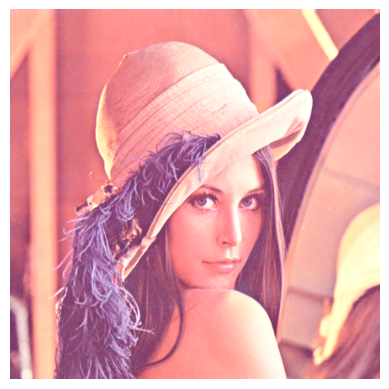

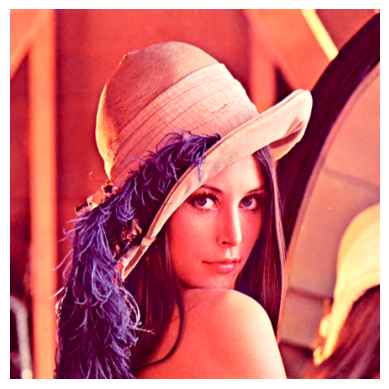

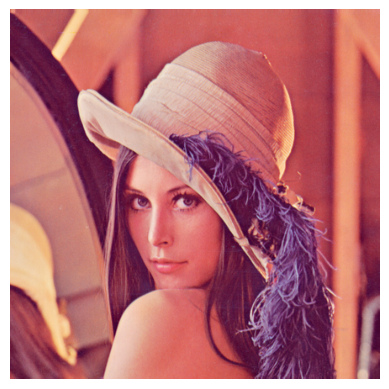

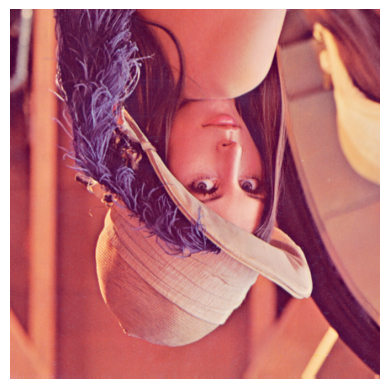

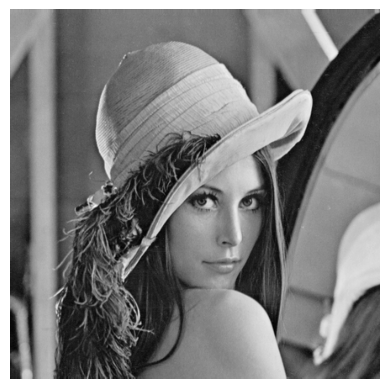

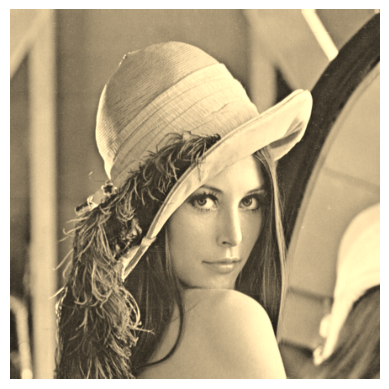

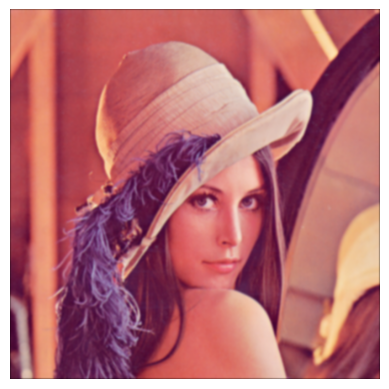

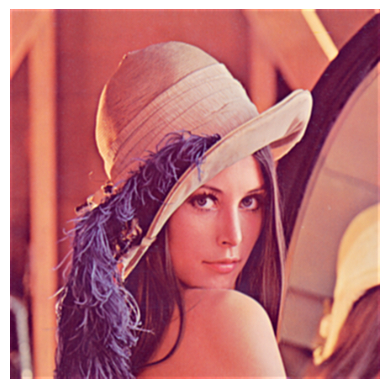

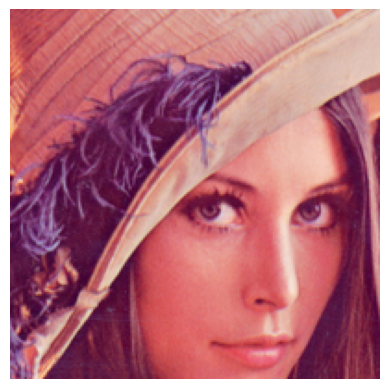

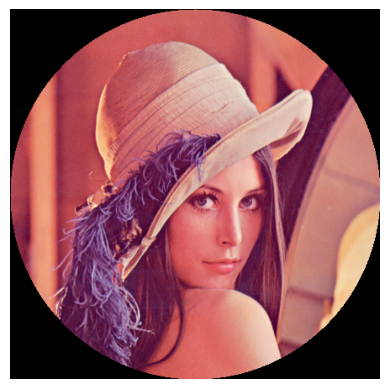

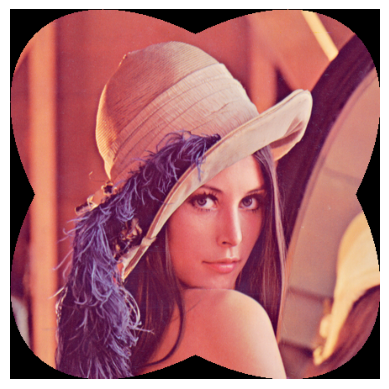

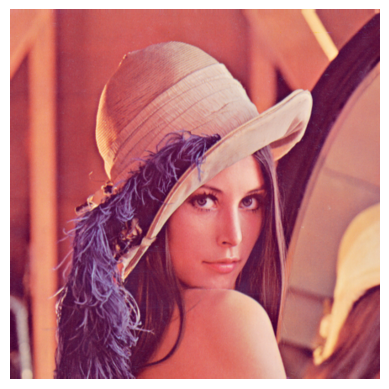

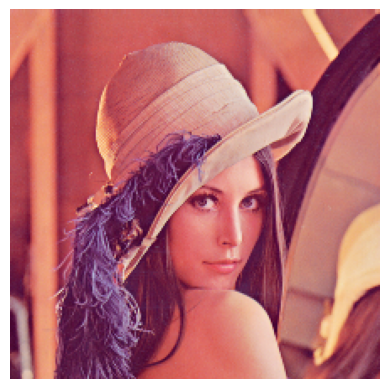

In [24]:
# Call main function
main()